# Image Scene Classification

### Importing the required packages

In [1]:
#importing the required packages
import os 
import cv2
import csv
import pandas as pd
from skimage.transform import resize 
from skimage.io import imread, imsave 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report    

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Image Preprocessing

### Taking the Training Images and Testing Images

In [2]:
#preprocessing steps
#taking the train data
train_path=r'C:\Users\gokul\OneDrive\Desktop\Classification\Dataset\train1'

train_input=[]#for 1D values
train_classes=[]#to be stored with the dataframe
classes=[]#to store the number of classes

#iterating through each folder
#take each image from each folder and add it to the array after resizing and flattening it
for folder in os.listdir(train_path):
    image_path=os.path.join(train_path,folder)
    for image in os.listdir(image_path):
        image_array=imread(os.path.join(image_path,image))
        image_array=resize(image_array,(50,50,3))
        train_input.append(image_array.flatten())
        
        #to append the class name of each image
        train_classes.append(folder)
    
    classes.append(folder)#to take the number of classes

train_input=np.array(train_input)
train_classes=np.array(train_classes)
print(f'Classes: {classes}')

Classes: ['buildings', 'forest', 'mountain', 'sea', 'street']


In [3]:
#dataframe creation for training data
dataframe=pd.DataFrame(train_input)
dataframe['class']=train_classes

#separating the input features and targets
x=dataframe.iloc[:,:-1]#selects all rows and (columns except the last)
y=dataframe.iloc[:,-1]#select all rows and the last column
print(dataframe.shape)

(10500, 7501)


In [4]:
#separate the input features and the target index
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

## Creating the Training Model and checking its Performance

### Creating the Model and Saving it

### SVM

### Using the default SVM parameters: Kernel= linear and C=0.1

In [9]:
#building the svm classifier with the training data

svm_classifier_old=make_pipeline(StandardScaler(), SVC(kernel='linear',C=0.1))

#training with the training image and class
svm_classifier_old.fit(x_train,y_train)
training_pred_old = svm_classifier_old.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, training_pred_old)
print("Accuracy:", accuracy)

Accuracy: 0.6142857142857143


In [10]:
#precision matrices
accuracy=accuracy_score(y_test,training_pred_old)
precision=precision_score(y_test,training_pred_old,average='weighted')
recall=recall_score(y_test,training_pred_old,average='weighted')
f1=f1_score(y_test,training_pred_old,average='weighted')

class_report=classification_report(y_test,training_pred_old)

print("Accuracy=",accuracy)
print("Precision=",precision)
print("Recall=",recall)
print("F1 score=",f1)
print("Classification Report:")
print(class_report)

Accuracy= 0.6142857142857143
Precision= 0.6135435903683129
Recall= 0.6142857142857143
F1 score= 0.613790538945671
Classification Report:
              precision    recall  f1-score   support

   buildings       0.43      0.40      0.42       420
      forest       0.75      0.75      0.75       420
    mountain       0.49      0.51      0.50       420
         sea       0.47      0.47      0.47       420
      street       0.93      0.93      0.93       420

    accuracy                           0.61      2100
   macro avg       0.61      0.61      0.61      2100
weighted avg       0.61      0.61      0.61      2100



### SVM with Kernel=linear

In [5]:
svm_classifier_training_linear=make_pipeline(StandardScaler(), SVC(kernel='linear',C=2))

#training with the training image and class
svm_classifier_training_linear.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=2, kernel='linear'))])

In [6]:
training_pred_linear = svm_classifier_training_linear.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, training_pred_linear)
print("Accuracy:", accuracy)

Accuracy: 0.6042857142857143


### SVM with Kernel=poly

In [7]:
#building the svm classifier with the training data

svm_classifier_training_poly=make_pipeline(StandardScaler(), SVC(kernel='poly',C=2))

#training with the training image and class
svm_classifier_training_poly.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=2, kernel='poly'))])

In [8]:
training_pred_poly = svm_classifier_training_poly.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, training_pred_poly)
print("Accuracy:", accuracy)

Accuracy: 0.6895238095238095


### SVM with Kernel=sigmoid

In [10]:
svm_classifier_training_sigmoid=make_pipeline(StandardScaler(), SVC(kernel='sigmoid',C=2))

#training with the training image and class
svm_classifier_training_sigmoid.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=2, kernel='sigmoid'))])

In [11]:
training_pred_sigmoid = svm_classifier_training_sigmoid.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, training_pred_sigmoid)
print("Accuracy:", accuracy)

Accuracy: 0.4776190476190476


### SVM with Kernel=rbf and C=1

In [5]:
#building the svm classifier with the training data

svm_classifier_training1=make_pipeline(StandardScaler(), SVC(kernel='rbf',C=1))

#training with the training image and class
svm_classifier_training1.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=1))])

In [6]:
training_pred1 = svm_classifier_training1.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, training_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.7938095238095239


### SVM with Kernel=rbf and C=3

In [14]:
#building the svm classifier with the training data

svm_classifier_training3=make_pipeline(StandardScaler(), SVC(kernel='rbf',C=3))

#training with the training image and class
svm_classifier_training3.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=3))])

In [15]:
training_pred3 = svm_classifier_training3.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, training_pred3)
print("Accuracy:", accuracy)

Accuracy: 0.8042857142857143


### SVM with Kernel=rbf and C=2, Best Accuracy

In [18]:
svm_classifier_training2=make_pipeline(StandardScaler(), SVC(kernel='rbf',C=2))

#training with the training image and class
svm_classifier_training2.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=2))])

In [8]:
training_pred2 = svm_classifier_training2.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, training_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.8061904761904762


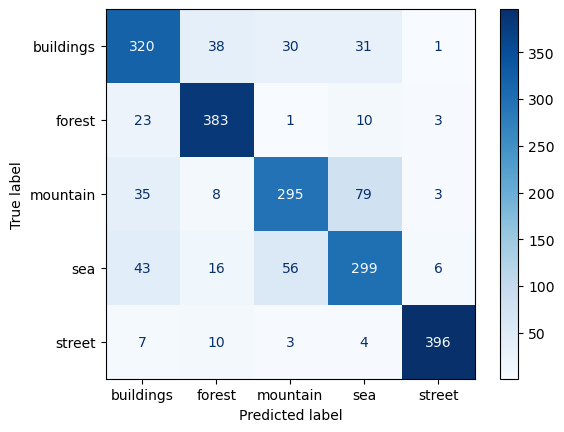

In [11]:
#plotting the confusion matrix for training SVM
ConfusionMatrixDisplay.from_predictions(y_test,training_pred2,cmap='Blues')

In [13]:
#precision matrices
accuracy=accuracy_score(y_test,training_pred2)
precision=precision_score(y_test,training_pred2,average='weighted')
recall=recall_score(y_test,training_pred2,average='weighted')
f1=f1_score(y_test,training_pred2,average='weighted')

class_report=classification_report(y_test,training_pred2)

print("Accuracy=",accuracy)
print("Precision=",precision)
print("Recall=",recall)
print("F1 score=",f1)
print("Classification Report:")
print(class_report)

Accuracy= 0.8061904761904762
Precision= 0.8061453020560515
Recall= 0.8061904761904762
F1 score= 0.8055608026737179
Classification Report:
              precision    recall  f1-score   support

   buildings       0.75      0.76      0.75       420
      forest       0.84      0.91      0.88       420
    mountain       0.77      0.70      0.73       420
         sea       0.71      0.71      0.71       420
      street       0.97      0.94      0.96       420

    accuracy                           0.81      2100
   macro avg       0.81      0.81      0.81      2100
weighted avg       0.81      0.81      0.81      2100



In [24]:
#saving the training model
joblib.dump(svm_classifier_training2, 'training_model.pkl')

['training_model.pkl']

In [4]:
#load the SVM model, optional
svm_classifier_training=joblib.load('training_model.pkl')

### KNN

In [16]:
#building the KNN classifier with the training data

KNN_Classifier=KNeighborsClassifier(n_neighbors=5)#preferred value is 5 nearest neighbors
KNN_Classifier.fit(x_train,y_train)

#convert x_test to np.array
x_test_np=x_test.values

knn_training_pred=KNN_Classifier.predict(x_test_np)

accuracy=accuracy_score(y_test,knn_training_pred)
print("Accuracy:",accuracy)

C:\Users\gokul\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\gokul\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\gokul\anaconda3\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\gokul\anaconda3\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\gokul\anaconda3\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


Accuracy: 0.6023809523809524


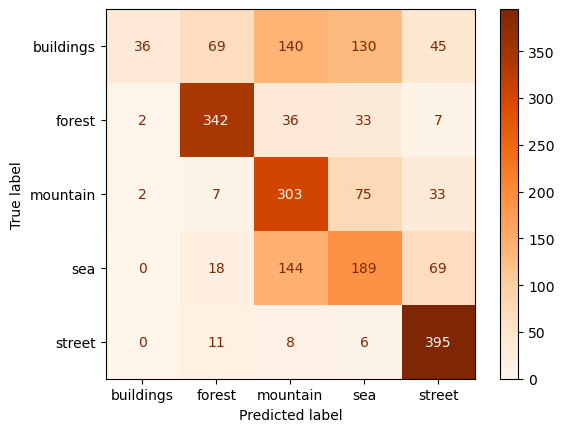

In [17]:
#plotting the confusion matrix for training KNN
ConfusionMatrixDisplay.from_predictions(y_test,knn_training_pred,cmap='Oranges')

In [18]:
#precision matrices
accuracy=accuracy_score(y_test,knn_training_pred)
precision=precision_score(y_test,knn_training_pred,average='weighted')
recall=recall_score(y_test,knn_training_pred,average='weighted')
f1=f1_score(y_test,knn_training_pred,average='weighted')

class_report=classification_report(y_test,knn_training_pred)

print("Accuracy=",accuracy)
print("Precision=",precision)
print("Recall=",recall)
print("F1 score=",f1)
print("Classification Report:")
print(class_report)

Accuracy= 0.6023809523809524
Precision= 0.6602540869285539
Recall= 0.6023809523809524
F1 score= 0.5560916250270425
Classification Report:
              precision    recall  f1-score   support

   buildings       0.90      0.09      0.16       420
      forest       0.77      0.81      0.79       420
    mountain       0.48      0.72      0.58       420
         sea       0.44      0.45      0.44       420
      street       0.72      0.94      0.82       420

    accuracy                           0.60      2100
   macro avg       0.66      0.60      0.56      2100
weighted avg       0.66      0.60      0.56      2100



### Random Forest

In [19]:
#training the Random forest classifier with the given training dataset
random_forest_training = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_training.fit(x_train, y_train)

# 4. Evaluate the Model
rf_pred = random_forest_training.predict(x_test)
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7538095238095238


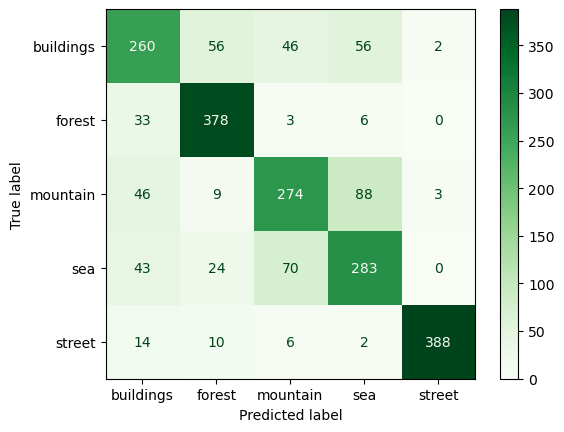

In [20]:
#plotting the confusion matrix for training Random Forest
ConfusionMatrixDisplay.from_predictions(y_test,rf_pred,cmap="Greens")

In [21]:
#precision matrices
accuracy=accuracy_score(y_test,rf_pred)
precision=precision_score(y_test,rf_pred,average='weighted')
recall=recall_score(y_test,rf_pred,average='weighted')
f1=f1_score(y_test,rf_pred,average='weighted')

class_report=classification_report(y_test,rf_pred)

print("Accuracy=",accuracy)
print("Precision=",precision)
print("Recall=",recall)
print("F1 score=",f1)
print("Classification Report:")
print(class_report)

Accuracy= 0.7538095238095238
Precision= 0.7547174690135063
Recall= 0.7538095238095238
F1 score= 0.7531301569213928
Classification Report:
              precision    recall  f1-score   support

   buildings       0.66      0.62      0.64       420
      forest       0.79      0.90      0.84       420
    mountain       0.69      0.65      0.67       420
         sea       0.65      0.67      0.66       420
      street       0.99      0.92      0.95       420

    accuracy                           0.75      2100
   macro avg       0.75      0.75      0.75      2100
weighted avg       0.75      0.75      0.75      2100



## Running the Test Data on the Trained Models

In [22]:
#taking the testing data
test_path=r'C:\Users\gokul\OneDrive\Desktop\Classification\Dataset\test1'

test_input=[]
test_classes=[]

for folder in os.listdir(test_path):
    image_path=os.path.join(test_path,folder)
    for image in os.listdir(image_path):
        image_array=imread(os.path.join(image_path,image))
        image_array=resize(image_array,(50,50,3))
        test_input.append(image_array.flatten())
        
        #to append the class name of each image
        test_classes.append(folder)
        
test_input=np.array(test_input)
test_classes=np.array(test_classes)

In [23]:
#dataframe creation
#dataframe for train data
train_df=pd.DataFrame(train_input)
train_df['class']=train_classes
print(train_df.shape)

#dataframe for test data
test_df=pd.DataFrame(test_input)
test_df['class']=test_classes
print(test_df.shape)

#allocating x train,test and y train, test
#image data
#x train from train_df
x_train=train_df.iloc[:,:-1]#selects all rows and (columns except the last)

#x test from test_df
x_test=test_df.iloc[:,:-1]

#class data
#y train from train_df
y_train=train_df.iloc[:,-1]#select all rows and the last column

#y test from test_df
y_test=test_df.iloc[:,-1]

(10500, 7501)
(2550, 7501)


### SVM

In [24]:
testing_pred=svm_classifier_training2.predict(x_test)
accuracy = accuracy_score(y_test, testing_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7458823529411764


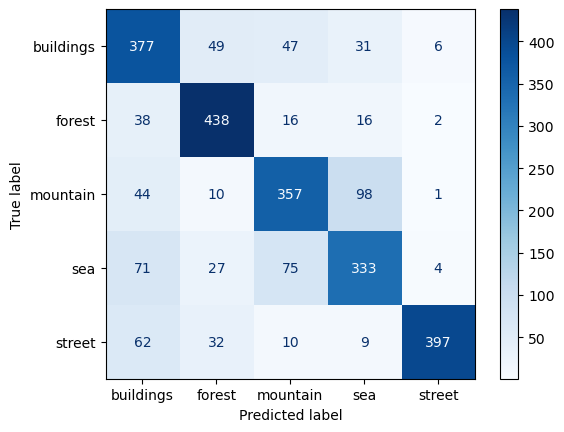

In [25]:
#plotting the confusion matrix for testing, SVM
ConfusionMatrixDisplay.from_predictions(y_test,testing_pred,cmap='Blues')

In [26]:
#precision matrices
accuracy=accuracy_score(y_test,testing_pred)
precision=precision_score(y_test,testing_pred,average='weighted')
recall=recall_score(y_test,testing_pred,average='weighted')
f1=f1_score(y_test,testing_pred,average='weighted')

class_report=classification_report(y_test,testing_pred)

print("Accuracy=",accuracy)
print("Precision=",precision)
print("Recall=",recall)
print("F1 score=",f1)
print("Classification Report:")
print(class_report)

Accuracy= 0.7458823529411764
Precision= 0.7567191437158729
Recall= 0.7458823529411764
F1 score= 0.7480939789452486
Classification Report:
              precision    recall  f1-score   support

   buildings       0.64      0.74      0.68       510
      forest       0.79      0.86      0.82       510
    mountain       0.71      0.70      0.70       510
         sea       0.68      0.65      0.67       510
      street       0.97      0.78      0.86       510

    accuracy                           0.75      2550
   macro avg       0.76      0.75      0.75      2550
weighted avg       0.76      0.75      0.75      2550



### KNN

In [27]:
#testing the KNN classifier with the new test data
#convert x_test to np.array
x_test_np=x_test.values

knn_testing_pred=KNN_Classifier.predict(x_test_np)

accuracy=accuracy_score(y_test,knn_testing_pred)
print("Accuracy:",accuracy)

Accuracy: 0.5705882352941176


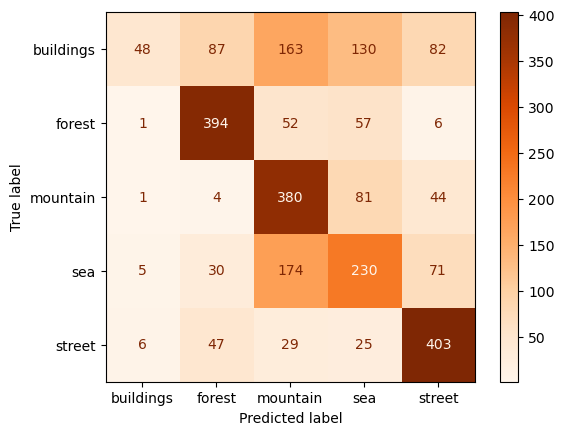

In [28]:
#plotting the confusion matrix for training KNN
ConfusionMatrixDisplay.from_predictions(y_test,knn_testing_pred,cmap='Oranges')

In [29]:
#precision matrices
accuracy=accuracy_score(y_test,knn_testing_pred)
precision=precision_score(y_test,knn_testing_pred,average='weighted')
recall=recall_score(y_test,knn_testing_pred,average='weighted')
f1=f1_score(y_test,knn_testing_pred,average='weighted')

class_report=classification_report(y_test,knn_testing_pred)

print("Accuracy=",accuracy)
print("Precision=",precision)
print("Recall=",recall)
print("F1 score=",f1)
print("Classification Report:")
print(class_report)

Accuracy= 0.5705882352941176
Precision= 0.6137860787787903
Recall= 0.5705882352941176
F1 score= 0.530353527217396
Classification Report:
              precision    recall  f1-score   support

   buildings       0.79      0.09      0.17       510
      forest       0.70      0.77      0.74       510
    mountain       0.48      0.75      0.58       510
         sea       0.44      0.45      0.45       510
      street       0.67      0.79      0.72       510

    accuracy                           0.57      2550
   macro avg       0.61      0.57      0.53      2550
weighted avg       0.61      0.57      0.53      2550



### Random Forest

In [30]:
#testing the RF classifier with the test data
rf_pred_testing = random_forest_training.predict(x_test)
accuracy=accuracy_score(y_test,rf_pred_testing)
print("Accuracy:",accuracy)

Accuracy: 0.7101960784313726


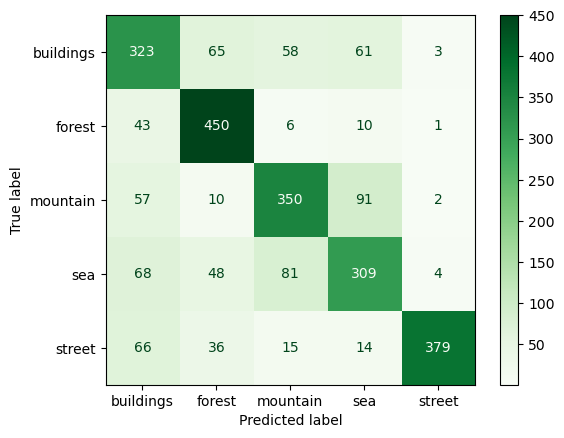

In [31]:
#plotting the confusion matrix for training RF
ConfusionMatrixDisplay.from_predictions(y_test,rf_pred_testing,cmap='Greens')

In [32]:
#precision matrices
accuracy=accuracy_score(y_test,rf_pred_testing)
precision=precision_score(y_test,rf_pred_testing,average='weighted')
recall=recall_score(y_test,rf_pred_testing,average='weighted')
f1=f1_score(y_test,rf_pred_testing,average='weighted')

class_report=classification_report(y_test,rf_pred_testing)

print("Accuracy=",accuracy)
print("Precision=",precision)
print("Recall=",recall)
print("F1 score=",f1)
print("Classification Report:")
print(class_report)

Accuracy= 0.7101960784313726
Precision= 0.7232979014442379
Recall= 0.7101960784313726
F1 score= 0.7120528897237207
Classification Report:
              precision    recall  f1-score   support

   buildings       0.58      0.63      0.61       510
      forest       0.74      0.88      0.80       510
    mountain       0.69      0.69      0.69       510
         sea       0.64      0.61      0.62       510
      street       0.97      0.74      0.84       510

    accuracy                           0.71      2550
   macro avg       0.72      0.71      0.71      2550
weighted avg       0.72      0.71      0.71      2550



## Predicting the Classes of the Unknown Images and Saving them according to their Predicted Classes 

In [2]:
#load the SVM model
svm_classifier_training=joblib.load('training_model.pkl')

In [15]:
#predicting the classes of unlabelled data
prediction_path=r'C:\Users\gokul\OneDrive\Desktop\Classification\Dataset\pred'
pred_input=[]
#no class labels are given
for file in os.listdir(prediction_path):
    image_path=os.path.join(prediction_path,file)
    image_array=imread(image_path)
    image_array=resize(image_array,(50,50,3))
    pred_input.append(image_array.flatten())
        
pred_input=np.array(pred_input)


In [16]:
#dataframe creation for prediction data
pred_df=pd.DataFrame(pred_input)

print(pred_df.shape)

#taking the number of images
images=pred_df.shape[0]

(2100, 7500)


In [19]:
prediction=svm_classifier_training2.predict(pred_df)
print(prediction)

['sea' 'buildings' 'buildings' ... 'mountain' 'forest' 'sea']


In [20]:
i=0
for image in os.listdir(prediction_path):
    image_path=os.path.join(prediction_path,image)
    if(i<images):
        new_image_name=f'{i+1}.{prediction[i]}.jpg'
        new_image_path=os.path.join(prediction_path,new_image_name)
        os.rename(image_path,new_image_path)
        i=i+1

print("The class labels has been assigned to the images")

The class labels has been assigned to the images


In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda=LDA(n_components=4)#n components=number of classes-1
x_train_lds=lda.fit_transform(x_train,y_train)
x_test_lda= lda.transform(x_test)

In [38]:
#building the svm classifier with the training data

svm_classifier_training=make_pipeline(StandardScaler(), SVC(kernel='rbf',C=1.0))

#training with the training image and class
svm_classifier_training.fit(x_train_lds,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [39]:
lda_pred_svm=svm_classifier_training.predict(x_test_lda)
accuracy = accuracy_score(y_test, lda_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.30366666666666664


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
}

# Initialize Grid Search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(x_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_}")

# Use the best estimator to predict
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 8.2min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 7.8min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 7.7min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 7.8min


In [34]:
from sklearn.decomposition import PCA

# Number of components can be determined based on explained variance
pca = PCA(n_components=0.95)  # Preserve 95% of variance
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


In [35]:

svm_classifier_training=make_pipeline(StandardScaler(), SVC(kernel='rbf',C=1.0))

#training with the training image and class
svm_classifier_training.fit(x_train_pca,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [37]:
pca_pred_svm=svm_classifier_training.predict(x_test_pca)
accuracy = accuracy_score(y_test, pca_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.5993333333333334


In [73]:
#resizing
i=1
new_path=r'C:\Users\gokul\OneDrive\Desktop\Classification\Dataset\train1\street'
path2=r'C:\Users\gokul\OneDrive\Desktop\Classification\Dataset\train1\street2'
for image in os.listdir(new_path):
    image_path=os.path.join(new_path,image)
    image_array=imread(image_path)
    image_array=resize(image_array,(150,150,3))
    image_array=(image_array*255).astype(np.uint8)
    new_path_name=os.path.join(path2,image)
    imsave(new_path_name,image_array)
    new_image_name=f'street {i}.jpg'
    new_image_path=os.path.join(path2,new_image_name)
    os.rename(new_path_name,new_image_path)
    i=i+1


In [24]:
i=1
new_path=r'C:\Users\gokul\OneDrive\Desktop\Classification\Dataset\test1\mountain'
for image in os.listdir(new_path):
    image_path=os.path.join(new_path,image)
    image_array=imread(image_path)
    new_image_name=f'mountain {i}.jpg'
    new_image_path=os.path.join(new_path,new_image_name)
    os.rename(image_path,new_image_path)
    i=i+1

## Working with CNN

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import os
from tensorflow.keras.utils import to_categorical

# Set the path to your dataset
dataset_dir = r'C:\Users\gokul\OneDrive\Desktop\Classification\Dataset\train1'

# Define image size and batch size
image_size = (150, 150)
batch_size = 32

# Use ImageDataGenerator to load the dataset
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% of data for validation

# Load training and validation data
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Set as training data
)
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

Found 8400 images belonging to 5 classes.
Found 2100 images belonging to 5 classes.


In [3]:
from tensorflow.keras import layers, models
#depth wise separable convolution
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 classes for categorical classification
])


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [51]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/30


262/262 [==============================] - 87s 331ms/step - loss: 0.8473 - accuracy: 0.6606 - val_loss: 0.6885 - val_accuracy: 0.7317
Epoch 2/30
262/262 [==============================] - 75s 285ms/step - loss: 0.6029 - accuracy: 0.7624 - val_loss: 0.5561 - val_accuracy: 0.7822
Epoch 3/30
262/262 [==============================] - 75s 286ms/step - loss: 0.5156 - accuracy: 0.7997 - val_loss: 0.5374 - val_accuracy: 0.7880
Epoch 4/30
262/262 [==============================] - 81s 307ms/step - loss: 0.4612 - accuracy: 0.8219 - val_loss: 0.4384 - val_accuracy: 0.8245
Epoch 5/30
262/262 [==============================] - 75s 284ms/step - loss: 0.4108 - accuracy: 0.8432 - val_loss: 0.4462 - val_accuracy: 0.8188
Epoch 6/30
262/262 [==============================] - 74s 282ms/step - loss: 0.3718 - accuracy: 0.8567 - val_loss: 0.3930 - val_accuracy: 0.8529
Epoch 7/30
262/262 [==============================] - 80s 305ms/step - loss: 0.3282 - accuracy: 0.8780 - val_loss: 0.3919 - val_

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
base_estimator = SVC(probability=True, kernel='linear')
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, algorithm='SAMME.R')

# Train the AdaBoost classifier
ada_boost.fit(x_train, y_train)

# Make predictions
train_predictions_ab = ada_boost.predict(x_train)
test_predictions_ab = ada_boost.predict(x_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, train_predictions_ab)
test_accuracy = accuracy_score(y_test, test_predictions_ab)